In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from  PIL import Image
from glob import glob

### the dataset consist of 7 classes


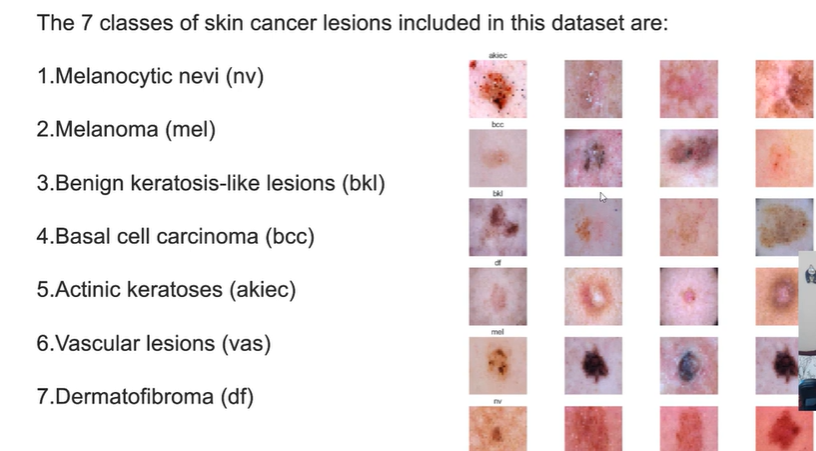

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\datasets\archive (4)\HAM10000_metadata.csv")

In [3]:
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [4]:
image_folder = 'C:/Users/Lenovo/Documents/datasets/archive (4)'

In [5]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(image_folder, '*', '*.jpg'))}


In [6]:
df['path'] = df['image_id'].map(image_path.get)

In [7]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:/Users/Lenovo/Documents/datasets/archive (4)...


In [8]:
print(list(image_path.items())[:5]) 

[('ISIC_0024306', 'C:/Users/Lenovo/Documents/datasets/archive (4)\\imagefin\\ISIC_0024306.jpg'), ('ISIC_0024307', 'C:/Users/Lenovo/Documents/datasets/archive (4)\\imagefin\\ISIC_0024307.jpg'), ('ISIC_0024308', 'C:/Users/Lenovo/Documents/datasets/archive (4)\\imagefin\\ISIC_0024308.jpg'), ('ISIC_0024309', 'C:/Users/Lenovo/Documents/datasets/archive (4)\\imagefin\\ISIC_0024309.jpg'), ('ISIC_0024310', 'C:/Users/Lenovo/Documents/datasets/archive (4)\\imagefin\\ISIC_0024310.jpg')]


In [9]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((28, 28)).convert('RGB')))

In [10]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."


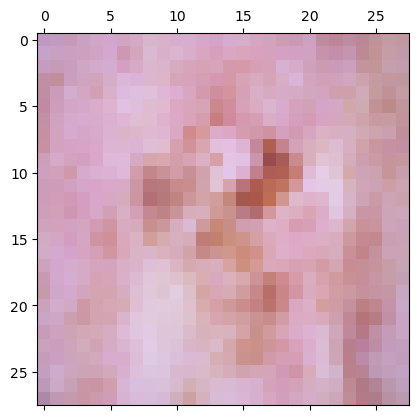

In [11]:
plt.matshow(df['image'][0])

In [12]:
df['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

<Axes: xlabel='dx', ylabel='count'>

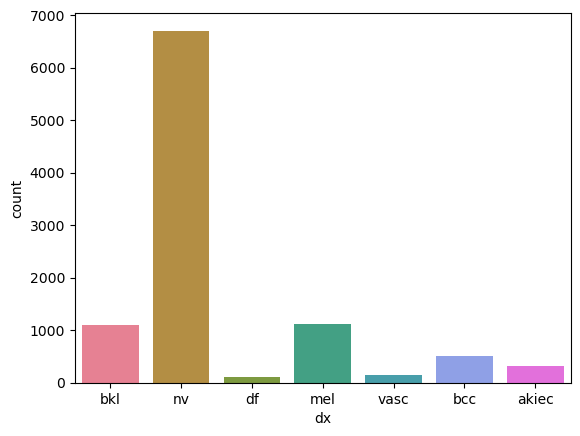

In [13]:
import seaborn as sns
sns.countplot(x="dx", data=df, hue = "dx", palette=("husl"))


### the data is unbalanced  so we  will use random oversampling on it

In [14]:
X = df.copy()

In [15]:
X.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."


In [16]:
X1= X.drop('dx', axis =1)

In [17]:
X1.head()

,lesion_id,image_id,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."


In [18]:
y= df['dx']
y

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [19]:
from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X1, y)

In [20]:
y_resampled.value_counts()

dx
bkl      6705
nv       6705
df       6705
mel      6705
vasc     6705
bcc      6705
akiec    6705
Name: count, dtype: int64

<Axes: xlabel='dx', ylabel='count'>

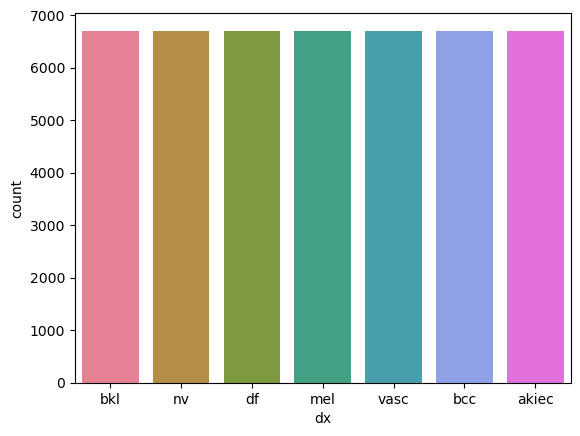

In [21]:
sns.countplot(x=y_resampled , hue = y_resampled,palette=("husl") )

### the data is now resampled with X1 and y

### to normalise the image-


In [22]:
def normalize_image(img):
    return np.array(img) / 255.0

X_resampled['image'] = X_resampled['image'].apply(normalize_image)

In [23]:
X_resampled['image']

0        [[[0.7529411764705882, 0.6, 0.7568627450980392...
1        [[[0.10588235294117647, 0.06274509803921569, 0...
2        [[[0.7529411764705882, 0.5411764705882353, 0.6...
3        [[[0.1568627450980392, 0.08235294117647059, 0....
4        [[[0.6235294117647059, 0.4470588235294118, 0.5...
                               ...                        
46930    [[[0.7372549019607844, 0.592156862745098, 0.64...
46931    [[[0.9372549019607843, 0.7607843137254902, 0.8...
46932    [[[0.6352941176470588, 0.5176470588235295, 0.5...
46933    [[[0.8666666666666667, 0.592156862745098, 0.68...
46934    [[[0.8313725490196079, 0.6078431372549019, 0.5...
Name: image, Length: 46935, dtype: object

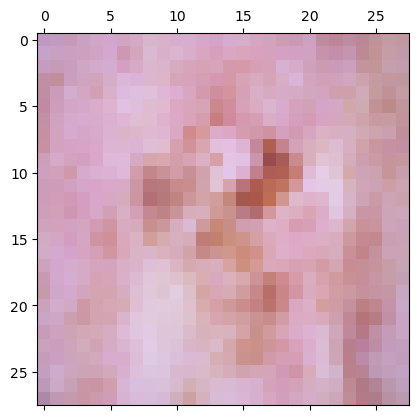

In [24]:
plt.matshow(X_resampled['image'][0])

In [25]:
X_resampled.shape


(46935, 8)

In [26]:
X_resampled.head()

,lesion_id,image_id,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[0.7529411764705882, 0.6, 0.7568627450980392..."
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[0.10588235294117647, 0.06274509803921569, 0..."
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[0.7529411764705882, 0.5411764705882353, 0.6..."
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[0.1568627450980392, 0.08235294117647059, 0...."
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,C:/Users/Lenovo/Documents/datasets/archive (4)...,"[[[0.6235294117647059, 0.4470588235294118, 0.5..."


In [27]:
y_resampled.head()

0    bkl
1    bkl
2    bkl
3    bkl
4    bkl
Name: dx, dtype: object

In [28]:
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")
print(f"y_resampled data type: {y_resampled.dtype}")

X_resampled shape: (46935, 8)
y_resampled shape: (46935,)
y_resampled data type: object


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torchvision import transforms, models
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import ast


## model training

In [30]:
class MedicalImageDataset(Dataset):
    def __init__(self, df, labels, transform=None):
        self.df = df
        self.transform = transform
        
        # Create label encoder
        self.label_encoder = LabelEncoder()
        self.encoded_labels = self.label_encoder.fit_transform(labels)
        # Convert to torch.long right away
        self.encoded_labels = torch.tensor(self.encoded_labels, dtype=torch.long)
        
        print(f"Dataset initialized with {len(self.df)} samples")
        print(f"Label mapping: {dict(zip(self.label_encoder.classes_, range(len(self.label_encoder.classes_))))}")
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        try:
            # Get image data
            image_str = self.df.iloc[idx]['image']
            
            # Convert string representation of array to numpy array
            if isinstance(image_str, str):
                image_data = np.array(ast.literal_eval(image_str))
            else:
                image_data = np.array(image_str)
            
            # Reshape image if needed
            if len(image_data.shape) == 1:
                size = int(np.sqrt(len(image_data) / 3))
                image_data = image_data.reshape(size, size, 3)
            
            # Resize to 224x224 if needed
            if image_data.shape[:2] != (224, 224):
                resized = np.zeros((224, 224, 3))
                h, w = min(image_data.shape[0], 224), min(image_data.shape[1], 224)
                resized[:h, :w, :] = image_data[:h, :w, :]
                image_data = resized
            
            # Normalize if needed
            if image_data.max() > 1:
                image_data = image_data / 255.0
                
            # Apply transforms
            if self.transform:
                image_data = self.transform(image_data.astype(np.float32))
            
            # Get label - already in torch.long format
            label = self.encoded_labels[idx]
            
            return image_data, label
            
        except Exception as e:
            print(f"Error processing item {idx}: {str(e)}")
            raise e

def train_model(model, train_loader, val_loader, device, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    best_val_acc = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (images, labels) in enumerate(train_loader):
            try:
                images = images.to(device)
                labels = labels.to(device)  # Labels are already torch.long
                
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()
                
                if batch_idx % 10 == 0:
                    print(f'Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}')
                    
            except Exception as e:
                print(f"Error in training batch {batch_idx}: {str(e)}")
                continue
        
        # Print epoch results
        train_acc = 100 * train_correct / train_total
        print(f'Epoch {epoch+1} - Train Acc: {train_acc:.2f}%')
        
        if train_acc > best_val_acc:
            best_val_acc = train_acc
            best_model_state = model.state_dict().copy()
    
    return best_model_state, best_val_acc

In [31]:
class SkinLesionDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        
        # Create label encoder for dx column
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(self.df['dx_type'])
        # Convert to torch.long right away
        self.labels = torch.tensor(self.labels, dtype=torch.long)
        
        print(f"Dataset initialized with {len(self.df)} samples")
        print(f"Label mapping: {dict(zip(self.label_encoder.classes_, range(len(self.label_encoder.classes_))))}")
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        try:
            # Get image data
            image_str = self.df.iloc[idx]['image']
            
            # Convert string representation of array to numpy array
            if isinstance(image_str, str):
                image_data = np.array(ast.literal_eval(image_str))
            else:
                image_data = np.array(image_str)
            
            # Reshape image to 224x224x3
            if len(image_data.shape) == 1:
                image_data = image_data.reshape(224, 224, 3)
            
            # Normalize if needed
            if image_data.max() > 1:
                image_data = image_data / 255.0
                
            # Apply transforms
            if self.transform:
                image_data = self.transform(image_data.astype(np.float32))
            
            # Get label
            label = self.labels[idx]
            
            return image_data, label
            
        except Exception as e:
            print(f"Error processing item {idx}: {str(e)}")
            raise e

def prepare_data(df, batch_size=32):
    print("Preparing data...")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    dataset = SkinLesionDataset(df, transform=transform)
    return dataset, batch_size

def create_model(num_classes):
    print(f"Creating model with {num_classes} classes")
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
    model.classifier = nn.Linear(model.classifier[1].in_features, num_classes)
    return model

def train_model(model, train_loader, val_loader, device, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', 
                                                         factor=0.5, patience=2, verbose=True)
    
    best_val_acc = 0
    best_model_state = None
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
            if batch_idx % 20 == 0:
                print(f'Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}')
        
        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        train_acc = 100 * train_correct / train_total
        val_acc = 100 * val_correct / val_total
        
        print(f'Epoch {epoch+1}:')
        print(f'Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.2f}%')
        
        # Update learning rate based on validation accuracy
        scheduler.step(val_acc)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
            print(f'New best validation accuracy: {best_val_acc:.2f}%')
    
    return best_model_state, best_val_acc

def k_fold_cross_validation(df, k=5, num_epochs=10, batch_size=32):
    print("\nStarting k-fold cross validation...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    num_classes = len(df['dx_type'].unique())
    print(f"Number of classes: {num_classes}")
    
    dataset, batch_size = prepare_data(df, batch_size)
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    
    fold_results = []
    indices = np.arange(len(dataset))
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(indices)):
        print(f'\nFold {fold+1}/{k}')
        print('-' * 50)
        
        train_sampler = SubsetRandomSampler(train_idx)
        val_sampler = SubsetRandomSampler(val_idx)
        
        train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=0)
        val_loader = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler, num_workers=0)
        
        model = create_model(num_classes).to(device)
        model_state, accuracy = train_model(model, train_loader, val_loader, device, num_epochs)
        
        fold_results.append({
            'fold': fold + 1,
            'accuracy': accuracy,
            'model_state': model_state
        })
        
        print(f'Fold {fold+1} completed with accuracy: {accuracy:.2f}%')
    
    # Print final results
    print("\nFinal Results:")
    accuracies = [result['accuracy'] for result in fold_results]
    for fold, acc in enumerate(accuracies, 1):
        print(f"Fold {fold}: {acc:.2f}%")
    print(f"Average accuracy: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}%")
    
    return fold_results

# Main execution
print("Starting the training process...")

try:
    # Run k-fold cross validation
    fold_results = k_fold_cross_validation(X_resampled, k=5, num_epochs=10, batch_size=32)
    
    # Get the best model
    best_fold = max(fold_results, key=lambda x: x['accuracy'])
    print(f"\nBest model achieved {best_fold['accuracy']:.2f}% accuracy on fold {best_fold['fold']}")
    
except Exception as e:
    print(f"\nError during execution: {str(e)}")

Starting the training process...

Starting k-fold cross validation...
Using device: cpu
Number of classes: 4
Preparing data...
Dataset initialized with 46935 samples
Label mapping: {'confocal': 0, 'consensus': 1, 'follow_up': 2, 'histo': 3}

Fold 1/5
--------------------------------------------------
Creating model with 4 classes


C:\instalation_directory_dev\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Batch 0, Loss: 1.4504
Epoch 1, Batch 20, Loss: 0.5062
Epoch 1, Batch 40, Loss: 1.0159
Epoch 1, Batch 60, Loss: 0.7512
Epoch 1, Batch 80, Loss: 0.8180
Epoch 1, Batch 100, Loss: 0.3767
Epoch 1, Batch 120, Loss: 0.2658
Epoch 1, Batch 140, Loss: 0.3169
Epoch 1, Batch 160, Loss: 0.3517
Epoch 1, Batch 180, Loss: 0.3792
Epoch 1, Batch 200, Loss: 0.3004
Epoch 1, Batch 220, Loss: 0.2324
Epoch 1, Batch 240, Loss: 0.3993
Epoch 1, Batch 260, Loss: 0.7326
Epoch 1, Batch 280, Loss: 0.7656
Epoch 1, Batch 300, Loss: 0.3686
Epoch 1, Batch 320, Loss: 0.4454
Epoch 1, Batch 340, Loss: 0.5378
Epoch 1, Batch 360, Loss: 0.2421
Epoch 1, Batch 380, Loss: 0.3950
Epoch 1, Batch 400, Loss: 0.1368
Epoch 1, Batch 420, Loss: 0.3188
Epoch 1, Batch 440, Loss: 0.2002
Epoch 1, Batch 460, Loss: 0.1455
Epoch 1, Batch 480, Loss: 0.2306
Epoch 1, Batch 500, Loss: 0.3037
Epoch 1, Batch 520, Loss: 0.3549
Epoch 1, Batch 540, Loss: 0.3479
Epoch 1, Batch 560, Loss: 0.3026
Epoch 1, Batch 580, Loss: 0.2645
Epoch 1, Batch 6